In [21]:
import torch
print(torch.__version__)

2.6.0+cu124


### Calculation of derivate manually

In [22]:
##e.g for x**2
def dy_dx(x):
  return 2*x
print(dy_dx(3))

6


In [23]:
import math
# incase if function is y = x**2 and z = siny
def dz_dx(x):
  return 2*x* math.cos(x**2)

print(dz_dx(3))

-5.466781571308061


In [ ]:
#### Implementing first function dy_dx using grad function of tensor

In [31]:
x = torch.tensor(3.0, requires_grad=True)
print(x)

tensor(3., requires_grad=True)


In [32]:
y = x**2
print(y)

tensor(9., grad_fn=<PowBackward0>)


In [34]:
y.backward()

In [35]:
print(x.grad)

tensor(6.)


In [ ]:
#### Implementing second function dz_dx using grad function of tensor

In [36]:
x = torch.tensor(3.0, requires_grad=True)
print(x)

tensor(3., requires_grad=True)


In [37]:
y = x**2
print(y)

tensor(9., grad_fn=<PowBackward0>)


In [38]:
z = torch.sin(y)
print(z)

tensor(0.4121, grad_fn=<SinBackward0>)


In [39]:
z.backward()

In [40]:
print(x.grad)

tensor(-5.4668)


## Implementing on a real nueral network

In [41]:
# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

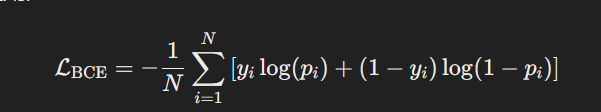

In [42]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [43]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

### Manual calculation of derivatives

In [44]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [45]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


### Now using auto grad of pytorch

In [46]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [47]:
z = w*x +b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [48]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [49]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [50]:
loss.backward()

In [52]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


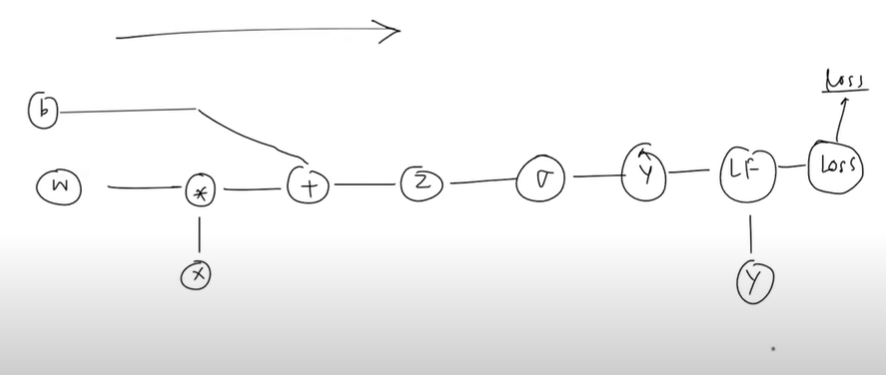

In [53]:
x = torch.tensor([1.0,2.0,3.0], requires_grad = True)

In [54]:
x

tensor([1., 2., 3.], requires_grad=True)

In [56]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [57]:
y.backward()

In [59]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

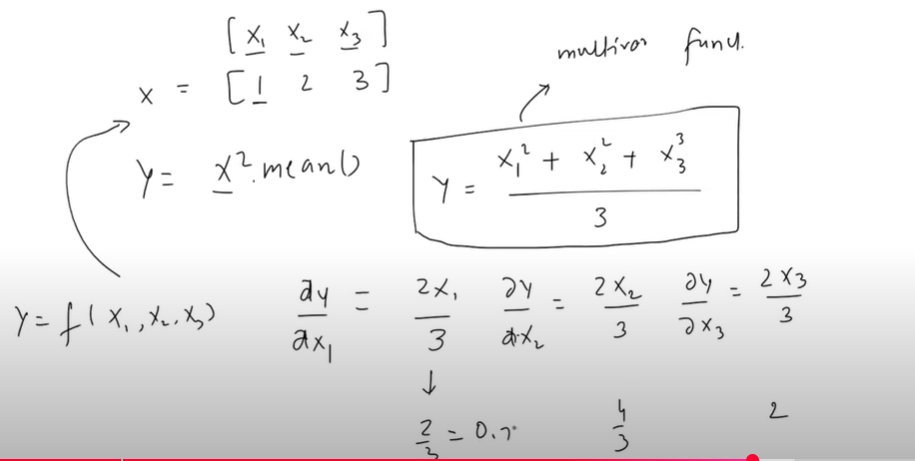

In [60]:
x.grad.zero_() # incase of multiple repititions

tensor([0., 0., 0.])

In [ ]:
## to disable gradient tracking
#option 1 - requires_grad_(False)
#option 2 - detach()
#option 3 - torch.no_grad()

In [63]:
x.requires_grad_(False)

tensor([1., 2., 3.])

In [64]:
x

tensor([1., 2., 3.])

In [65]:
y = x**2

In [66]:
#will not work because now gradient is off
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [67]:
x = torch.tensor(2.0, requires_grad =True)
x

tensor(2., requires_grad=True)

In [68]:
z = x.detach()
z

tensor(2.)

In [69]:
y = x**2

In [70]:
#this will work
y.backward()

In [71]:
x.grad

tensor(4.)

In [ ]:
y1 = z**2
#this will not work
y1.backward()

In [72]:
torch.no_grad()